In [183]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [184]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [206]:
labels = train[[0]] 
labels_copy = train[[0]]
features = train[train.columns[1:785]] 

In [207]:
# display MNIST digits
def row_to_square(feature):
    #print feature[0:28]
    square = np.empty([28,28])
    for i in range(0,28):                     
        square[i,:] = feature[i*28:(i*28)+28]
    return square

sample_digits = np.empty([10, 784])

for i in range(0,10):
    for j in range(0,len(labels)):
        if labels.loc[j].label == i:
            label_digit = labels.loc[j].label 
            feature_digit = features.loc[j]
            sample_digits[i,:] = feature_digit
            image_matrix = row_to_square(feature_digit)
            plt.pyplot.imsave('mnist_digit' + str(i) + '.png', image_matrix)
            break

[[ 4132.  4684.  4178.  4351.  4073.  3796.  4137.  4402.  4063.  4188.]]
[[ 1.08851423  1.23393045  1.10063224  1.14620653  1.07297155  1.
   1.0898314   1.15964173  1.0703372   1.1032666 ]]


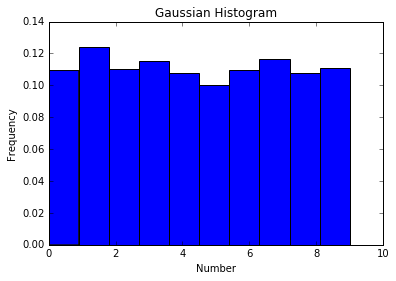

In [208]:
# prior probability of digits
counters = np.empty([1,10]) # prior probability
for i in range(0, len(labels)):
     counters[0,int(labels.loc[i].label)] += 1
print counters

print counters/counters.min()
count_norm = (counters/counters.min()).transpose()

#plt.pyplot.bar(range(10), count_norm)

# histogram plot
plt.pyplot.hist(labels.label, normed=1)
plt.pyplot.title("Gaussian Histogram")
plt.pyplot.xlabel("Number")
plt.pyplot.ylabel("Frequency")

fig = plt.pyplot.gcf()
fig.show()


In [212]:
#"Sample Digits" are in sample_digits

# find distance with all digits 
dist_min = np.empty([2,10]) 
#labels_copy = labels

# find the one with minimum distance
for i in range(0,10):
    # min is initialised to first feature row
    #min = numpy.linalg.norm(sample_digits[i,:]-features.loc[0])
    min = 2000
    min_index = 0
    
    # go through the labels 
    for j in range(0,len(labels)):
        # and calculating the dist
        dist = numpy.linalg.norm(sample_digits[i,:]-features.loc[j])
        
        # determine if less than current min and not zero 
        if dist < min and dist != 0.0:
            min = dist               # update min
            min_index = j 
            
        # compare labels
    if i != labels.loc[min_index].label:
        labels_copy.loc[min_index].label = str(labels.loc[min_index].label) + '*'
    print i, labels_copy.loc[min_index].label, min, min_index
    dist_min[0,i] = min
    dist_min[1,i] = min_index
        
print dist_min

0 0 1046.59543282 12950
1 1 489.679487012 29704
2 2 1380.8772574 9536
3 5 1832.66499939 8981
4 4 1356.88098225 14787
5 5 1066.36766643 30073
6 6 1446.51132038 16240
7 7 863.501013317 15275
8 8 1593.777588 32586
9 9 910.576740314 35742
[[  1046.59543282    489.67948701   1380.8772574    1832.66499939
    1356.88098225   1066.36766643   1446.51132038    863.50101332
    1593.777588      910.57674031]
 [ 12950.          29704.           9536.           8981.          14787.
   30073.          16240.          15275.          32586.          35742.        ]]


In [213]:
labels_copy.loc[8981]

label    5
Name: 8981, dtype: int64